In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.linalg import expm 

In [18]:
gamma = -1
w = 1

def timeEvol(t_ini, t_fin):
    dt = t_fin - t_ini
    dcos = np.cos(w*t_fin) - np.cos(w*t_ini)
    dsin = np.sin(w*t_fin) - np.sin(w*t_ini)

    u = np.array([[1 + .5j*dt, -(-1j*dsin + gamma*dcos)/w],
                  [(1j*dsin + gamma*dcos)/w, 1 - .5j*dt]])
    return u

In [19]:

def Integrate(H, a, b):
    # Get the shape of the matrix by evaluating the function at some point
    sample_matrix = H((a + b) / 2)
    matrix_shape = sample_matrix.shape
    
    # Initialize the result matrix with the same shape
    result_matrix = np.zeros(matrix_shape)

    # Iterate over each element in the matrix and integrate it
    for i in range(matrix_shape[0]):
        for j in range(matrix_shape[1]):
            # Define a lambda function that returns the specific element for integration
            element_func = lambda t: H(t)[i, j]
            result_matrix[i, j] = quad(element_func, a, b)[0]
    
    return result_matrix

def Magnus2(H, a, b):
    return Integrate(lambda t1: H(t1) + .5*Integrate(lambda t2: np.matmul(H(t1),H(t2))-np.matmul(H(t2),H(t1)), a, t1), a, b)

In [20]:

tau = 1
omega_0 = 1
omega_l = 0
alpha = 0
area = np.pi

def env(t):
    E_0 = area/np.sqrt(2*np.pi)
    g1 = np.exp(-0.5*t*2/tau*2)
    return E_0*g1

def phase(t):
    return np.exp(-1j*alpha*t**2)

delta = omega_l-omega_0
delta_p = omega_l+omega_0

def hamiltonian(t):
    h = np.array([[0, -0.5*env(t)*phase(t)*np.exp(-1j*delta_p*t) - 0.5*env(t)*np.conj(phase(t))*np.exp(1j*delta*t)],
        [-0.5*env(t)*phase(t)*np.exp(-1j*delta*t) - 0.5*env(t)*np.conj(phase(t))*np.exp(1j*delta_p*t), 0]], dtype='complex')
    return h

/home/ju/miniconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/home/ju/miniconda3/lib/python3.12/site-packages/scipy/linalg/_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
/home/ju/miniconda3/lib/python3.12/site-packages/scipy/linalg/_matfuncs.py:358: RuntimeWarning: invalid value encountered in matmul
  eAw = eAw @ eAw


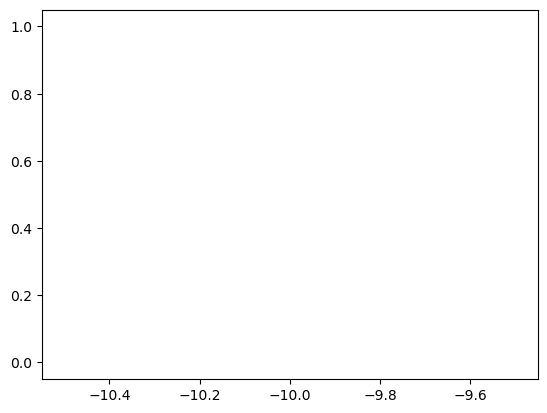

In [21]:

phi_0 = np.array([1, 0])

N = 10
T = 10
time = np.linspace(-T, T, N)
prop_g = np.ones(N)
prop_e = np.zeros(N)
dt = T/N


temp = phi_0
for ii in range(N-1):
    temp = np.einsum('ij, j', expm(Magnus2(hamiltonian, time[ii], time[ii+1])), temp)
    prop_g[ii+1] = np.abs(temp[0])**2
    prop_e[ii+1] = np.abs(temp[1])**2

plt.plot(time, prop_g, time, prop_e, time, prop_g + prop_e)
plt.show()


In [22]:
#Fast pulse definition
def envelop(tau, area, t):

    return area*np.exp(-.5*(t**2)/(tau**2))/(tau*np.sqrt(2*np.pi))

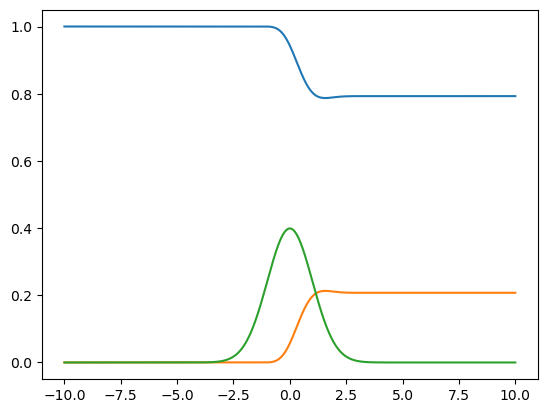

In [23]:
n=1
tau = 1
w0 = 1
w = 1

def H(t): 
    E0 = envelop(tau, n*np.pi, t)

    return np.array([[-.5*w0, -.5*E0*np.cos(w*t)],
                     [-.5*E0*np.cos(w*t), .5*w0]], dtype='complex')

phi_0 = np.array([1, 0])
N = 100000
T = 10
dt = T/N

phi_t = np.zeros((N,2), dtype='complex')
phi_t[0] = phi_0

time = np.linspace(-T, T, N)
for ii in range(N-1):
    phi_t[ii+1] = phi_t[ii] - 1j*np.matmul(H(time[ii]), phi_t[ii])*dt

plt.plot(time, np.abs(phi_t[:,0])**2, time, np.abs(phi_t[:,1])**2, time, envelop(tau, n*np.pi, time)/(n*np.pi))
plt.show()

In [24]:
from scipy.integrate import quad
quad(lambda t: envelop(tau, n*np.pi, t), -np.inf, np.inf)[0]


3.1415926535897927